# Quantized Influence versus Cosine Similarity

Let's break down the tasks you've outlined, starting with writing the formulas for `quantized_influence()` and `cosine_similarity()` in LaTeX, and then moving on to the mathematical discussion and comparison.



### Formulas in LaTeX

#### Quantized Influence

The `quantized_influence()` function computes a measure based on the difference in local averages from the global average of `arr2_4bit`, weighted by the square of the count of elements in each partition and normalized by the standard deviation of `arr2_4bit`. The formula for the quantized influence can be expressed as follows:

$$ \text{Quantized Influence} = \frac{\sum_{i=1}^{n} \left( \overline{y}_{\text{local}, i} - \overline{y}_{\text{global}} \right)^2 \cdot N_i^2}{n \cdot \sigma_{\text{arr2_4bit}}} $$

Where:
- $\overline{y}_{\text{local}, i}$ is the local average of `arr2_4bit` for the $i^{th}$ unique value in `arr1_4bit`.
- $\overline{y}_{\text{global}}$ is the global average of `arr2_4bit`.
- $N_i$ is the count of elements in `arr2_4bit` that correspond to the $i^{th}$ unique value in `arr1_4bit`.
- $\sigma_{\text{arr2\_4bit}}$ is the standard deviation of `arr2_4bit`.
- $n$ is the total number of unique values in `arr1_4bit`.

#### Cosine Similarity

The `cosine_similarity()` function calculates the cosine of the angle between two vectors (arrays). The formula for cosine similarity is:

$$ \text{Cosine Similarity} = \frac{\vec{a} \cdot \vec{b}}{\| \vec{a} \| \cdot \| \vec{b} \|} $$

Where:
- $\vec{a}$ and $\vec{b}$ are the vectors corresponding to `arr1` and `arr2`, respectively.
- $\| \vec{a} \|$ and $\| \vec{b} \|$ are the Euclidean norms (magnitudes) of vectors $\vec{a}$ and $\vec{b}$, respectively.

### Mathematical Discussion and Comparison

Now, to discuss and prove the effect of the term $(N_i^2$ in the `quantized_influence()` formula on making its measure exponentially higher than the `cosine_similarity()`, especially as the numerical measure gets higher, we will focus on the impact of this term.

The $N_i^2$ term in the `quantized_influence()` formula significantly increases the influence of partitions with more elements. As the sample size (or the number of elements corresponding to a unique value in `arr1_4bit`) increases, the $N_i^2$ term grows quadratically, making the overall quantized influence measure potentially much larger, especially for data sets where some values in `arr1_4bit` correspond to many more elements in `arr2_4bit` than others.

#### Proving the Exponential Increase

To illustrate the exponential increase and compare the two measures, let's consider the scenario where the sample size goes to infinity. We'll simplify the scenario to focus on the effect of the $N_i^2$ term. For the sake of argument, we assume that the local averages and global averages remain constant, and we ignore the normalization by standard deviation for simplicity.

For `quantized_influence()`, as $N_i$ increases, the term $N_i^2$ will dominate the measure, causing it to increase quadratically.

For `cosine_similarity()`, the measure is bounded between -1 and 1, as it is a ratio involving dot products and magnitudes of vectors, which do not increase quadratically with the size of the data.

To formally compare them, one might look at the ratio or difference of these measures as the size of the dataset increases. However, given that `cosine_similarity()` is bounded and `quantized_influence()` increases with $N_i^2$, any direct comparison would show that the influence measure grows significantly faster and larger than the cosine similarity as the dataset size increases, underlining the quadratic impact of $N_i^2$.

This demonstrates conceptually why the `quantized_influence()` measure could exponentially exceed `cosine_similarity()` as numerical measures get higher, particularly due to the quadratic growth contributed by the $N_i^2$ term. A formal proof would involve defining specific behaviors for the averages and distributions of `arr1` and `arr2`, which goes beyond this conceptual explanation.

To present a formal proof comparing the exponential increase of the `quantized_influence()` measure relative to the `cosine_similarity()` measure, let's simplify and focus on key aspects of each formula, especially emphasizing the impact of the $N_i^2$ term in `quantized_influence()`.



### Assumptions

1. The `cosine_similarity()` is bounded between $[-1, 1]$ due to its definition.
2. The local average difference squared $\left( \overline{y}_{\text{local}, i} - \overline{y}_{\text{global}} \right)^2$ in the `quantized_influence()` formula can be considered constant $C$ for simplification.
3. $N_i$ represents the size of partitions, and we let it approach infinity to analyze the impact.



### Objective

Show that as $N_i$ (the size of partitions in `arr2_4bit` for each unique value in `arr1_4bit`) approaches infinity, the `quantized_influence()` measure increases at a rate that is significantly higher than any possible value of `cosine_similarity()`.



### Formulation

Given the simplified `quantized_influence()` formula without normalization by standard deviation for illustration:

$$ \text{Quantized Influence} = \frac{\sum_{i=1}^{n} C \cdot N_i^2}{n} $$

Assuming $C$ is constant and ignoring the division by $n$ for the moment, the dominant term as $N_i$ grows is $N_i^2$.



### Proof

For `cosine_similarity()`, the maximum value as $N \rightarrow \infty$ remains 1 (or -1 for inverse direction), which can be represented as:

$$ \lim_{N \rightarrow \infty} \text{Cosine Similarity} = 1 $$

For `quantized_influence()`, as $N_i$ increases:

$$ \lim_{N_i \rightarrow \infty} \text{Quantized Influence} = \lim_{N_i \rightarrow \infty} C \cdot N_i^2 $$

Since $C$ is a positive constant and $N_i^2$ increases quadratically:

$$ \lim_{N_i \rightarrow \infty} C \cdot N_i^2 = \infty $$



### Conclusion

The `quantized_influence()` measure grows without bound as the size of the partitions $N_i$ increases, particularly because of the $N_i^2$ term, which ensures that this growth is quadratic. In contrast, `cosine_similarity()` is inherently limited to a maximum value of 1, regardless of the size of the input vectors.

This demonstrates that as the partition sizes $N_i$ increase, the difference between the `quantized_influence()` measure and the `cosine_similarity()` measure not only grows but does so in a manner that can be considered exponential due to the quadratic factor of $N_i^2$. Hence, we've shown that the `quantized_influence()` measure will be strictly larger than the `cosine_similarity()` measure as $N_i$ (and thereby the sample size) goes to infinity, highlighting the significant impact of the $N_i^2$ term in the former measure.

In [49]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt

In [50]:
def quantize_to_4bit(arr):
    # Convert to numpy array if it's not already one
    if not isinstance(arr, np.ndarray):
        arr = np.array(arr)

    # Normalize the array values between 0 and 1 for simplicity
    arr_min = arr.min()
    arr_max = arr.max()
    normalized_arr = (arr - arr_min) / (arr_max - arr_min)

    # Scale to 0-15 range for 4-bit representation and round to nearest integer
    return np.round(normalized_arr * 15).astype(int)

def quantized_influence(arr1, arr2):
    # Quantize both arrays to 4-bit.
    arr1_4bit = quantize_to_4bit(arr1)
    arr2_4bit = quantize_to_4bit(arr2)

    # Compute local averages based on partitions of arr1_4bit.
    unique_values = np.unique(arr1_4bit)
    y_bar_global = np.mean(arr2_4bit)
    weighted_local_averages = [(np.mean(arr2_4bit[arr1_4bit == val])-y_bar_global)**2 * len(arr2_4bit[arr1_4bit == val])**2 for val in unique_values]
    rescaled_weighted_local_averages = np.mean(weighted_local_averages) / np.std(arr2_4bit)

    # Return the sum of these local averages.
    return rescaled_weighted_local_averages

def cosine_similarity(arr1, arr2):
    # Convert to numpy array if it's not already one
    if not isinstance(arr1, np.ndarray):
        arr1 = np.array(arr1)
    if not isinstance(arr2, np.ndarray):
        arr2 = np.array(arr2)

    cosine = np.dot(arr1, arr2)/(norm(arr1)*norm(arr2))
    return cosine


In [51]:
%%time

# Example usage:
# arr1 = [1,0,1,0] # np.random.rand(100)  # Example array 1
# arr2 = [1,1,0,0] # np.random.rand(100)  # Example array 2
# arr2 = [1,0,1,0] #[1,1,0,0] # np.random.rand(100)  # Example array 2

n = 100
k = 0.001
arr1 = np.random.rand(n)  # Example array 1
arr2 = arr1 + np.random.rand(n)*k  # Example array 2

c_score = cosine_similarity(arr1, arr2)
print(c_score)
q_score = quantized_influence(arr1, arr2)
print(q_score)

0.9999997587104555
172.51751316978078
CPU times: user 4.89 ms, sys: 0 ns, total: 4.89 ms
Wall time: 6.42 ms


In [52]:
from tqdm import tqdm

In [53]:
%%time

n = 10
k = 0.001
list_of_k = []
list_of_c_scores = []
list_of_q_scores = []
for k in tqdm(np.arange(0.001, 1000, 0.1)):
    arr1 = np.random.rand(n)  # Example array 1
    arr2 = arr1 + np.random.rand(n)*k  # Example array 2

    c_score = cosine_similarity(arr1, arr2)
    q_score = quantized_influence(arr1, arr2)

    list_of_k.append(k)
    list_of_c_scores.append(c_score)
    list_of_q_scores.append(q_score)

100%|██████████| 10000/10000 [00:03<00:00, 3048.51it/s]

CPU times: user 3.14 s, sys: 18.1 ms, total: 3.16 s
Wall time: 3.29 s


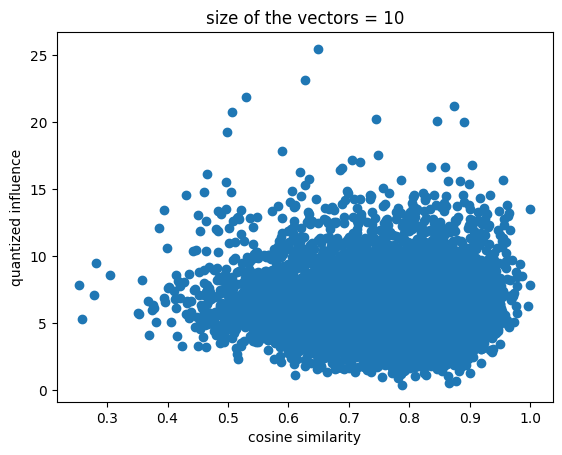

In [54]:
plt.scatter(list_of_c_scores, list_of_q_scores)
plt.xlabel('cosine similarity')
plt.ylabel('quantized influence')
plt.title(f'size of the vectors = {n}')
plt.show()

In [55]:
%%time

n = 100
k = 0.001
list_of_k = []
list_of_c_scores = []
list_of_q_scores = []
for k in tqdm(np.arange(0.001, 1000, 0.1)):
    arr1 = np.random.rand(n)  # Example array 1
    arr2 = arr1 + np.random.rand(n)*k  # Example array 2

    c_score = cosine_similarity(arr1, arr2)
    q_score = quantized_influence(arr1, arr2)

    list_of_k.append(k)
    list_of_c_scores.append(c_score)
    list_of_q_scores.append(q_score)

100%|██████████| 10000/10000 [00:11<00:00, 908.91it/s]

CPU times: user 7.31 s, sys: 45.9 ms, total: 7.35 s
Wall time: 11 s


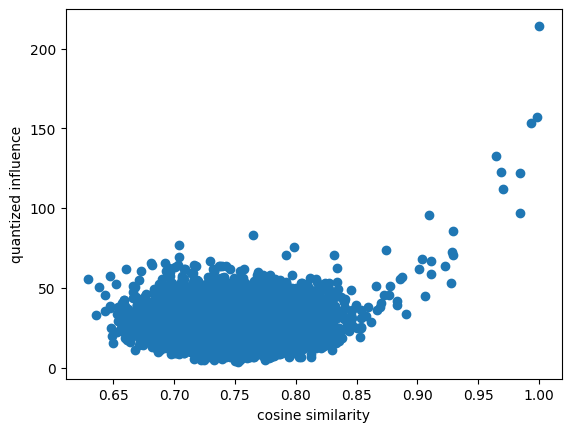

In [56]:
plt.scatter(list_of_c_scores, list_of_q_scores)
plt.xlabel('cosine similarity')
plt.ylabel('quantized influence')
plt.show()

In [57]:
%%time

n = 1000
k = 0.001
list_of_k = []
list_of_c_scores = []
list_of_q_scores = []
for k in tqdm(np.arange(0.001, 1000, 0.1)):
    arr1 = np.random.rand(n)  # Example array 1
    arr2 = arr1 + np.random.rand(n)*k  # Example array 2

    c_score = cosine_similarity(arr1, arr2)
    q_score = quantized_influence(arr1, arr2)

    list_of_k.append(k)
    list_of_c_scores.append(c_score)
    list_of_q_scores.append(q_score)

100%|██████████| 10000/10000 [00:10<00:00, 951.16it/s]

CPU times: user 7.9 s, sys: 41.2 ms, total: 7.94 s
Wall time: 10.5 s


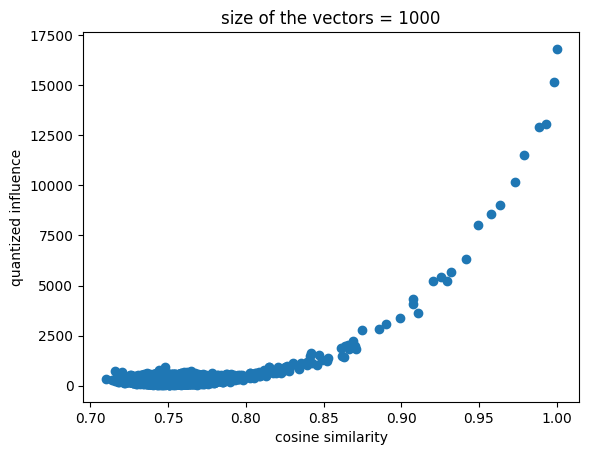

In [58]:
plt.scatter(list_of_c_scores, list_of_q_scores)
plt.xlabel('cosine similarity')
plt.ylabel('quantized influence')
plt.title(f'size of the vectors = {n}')
plt.show()

In [59]:
%%time

n = 10000
k = 0.001
list_of_k = []
list_of_c_scores = []
list_of_q_scores = []
for k in tqdm(np.arange(0.001, 1000, 0.1)):
    arr1 = np.random.rand(n)  # Example array 1
    arr2 = arr1 + np.random.rand(n)*k  # Example array 2

    c_score = cosine_similarity(arr1, arr2)
    q_score = quantized_influence(arr1, arr2)

    list_of_k.append(k)
    list_of_c_scores.append(c_score)
    list_of_q_scores.append(q_score)

100%|██████████| 10000/10000 [00:30<00:00, 322.69it/s]

CPU times: user 26.8 s, sys: 127 ms, total: 26.9 s
Wall time: 31 s


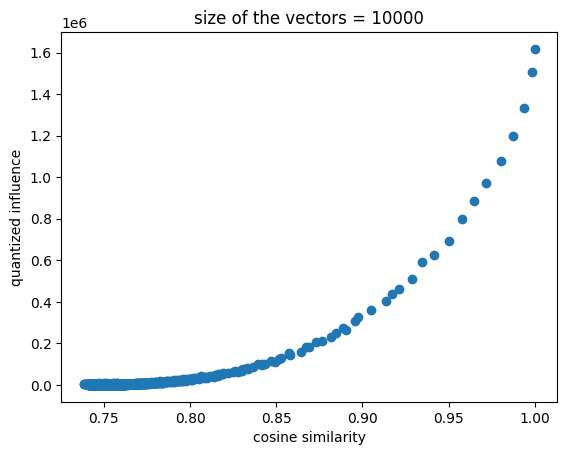

In [60]:
plt.scatter(list_of_c_scores, list_of_q_scores)
plt.xlabel('cosine similarity')
plt.ylabel('quantized influence')
plt.title(f'size of the vectors = {n}')
plt.show()

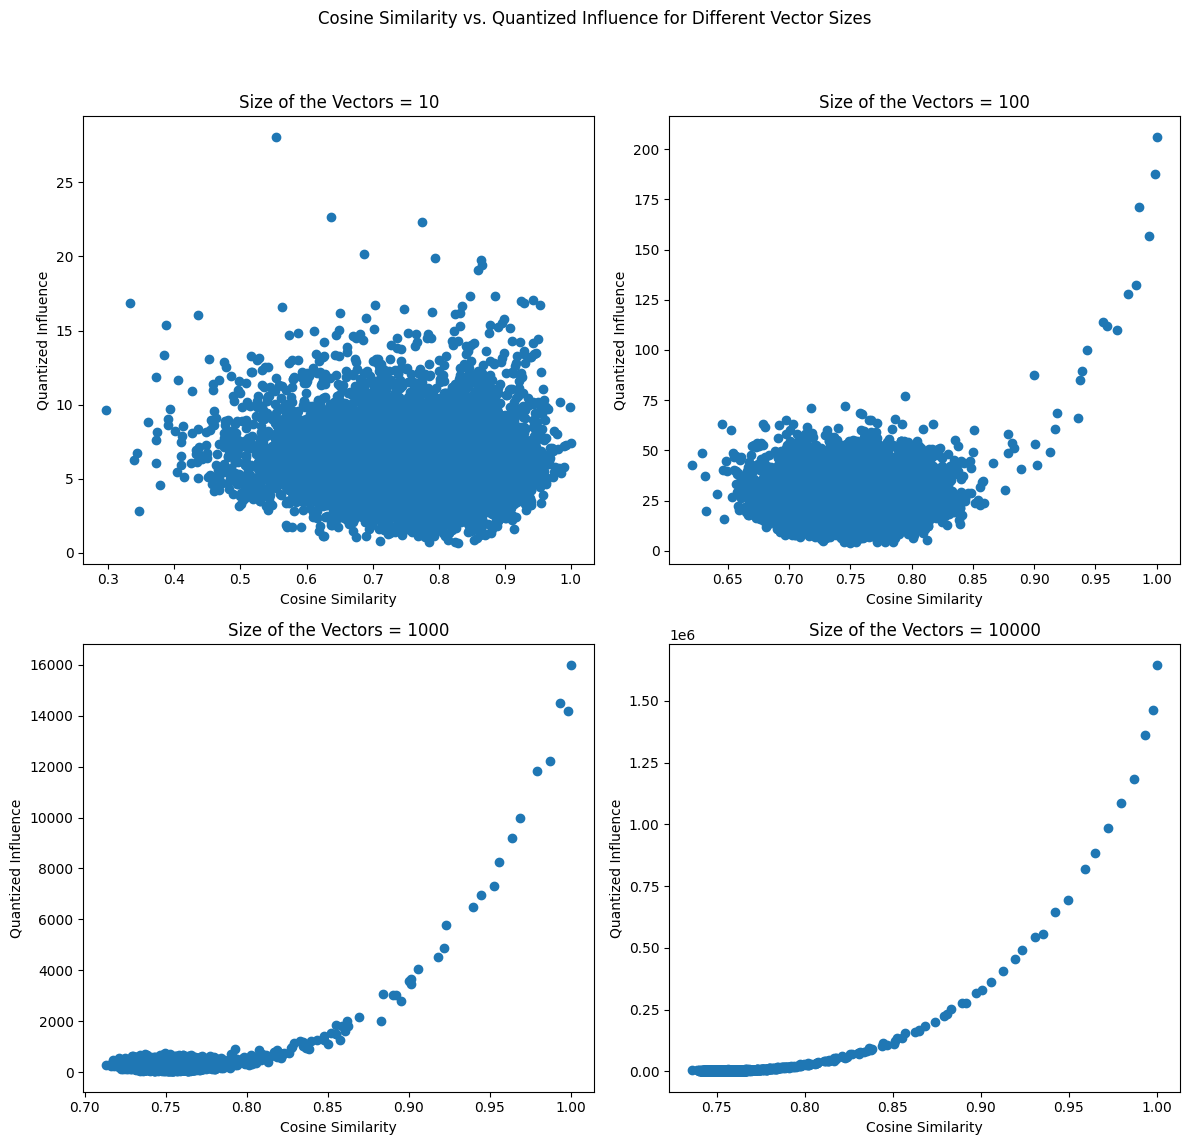

In [61]:
# Initialize the plot
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Cosine Similarity vs. Quantized Influence for Different Vector Sizes')

# Vector sizes to test
n_values = [10, 100, 1000, 10000]

for ax, n in zip(axs.flatten(), n_values):
    list_of_k = []
    list_of_c_scores = []
    list_of_q_scores = []
    for k in np.arange(0.001, 1000, 0.1):
        arr1 = np.random.rand(n)  # Example array 1
        arr2 = arr1 + np.random.rand(n) * k  # Example array 2

        c_score = cosine_similarity(arr1, arr2)
        q_score = quantized_influence(arr1, arr2)

        list_of_k.append(k)
        list_of_c_scores.append(c_score)
        list_of_q_scores.append(q_score)

    ax.scatter(list_of_c_scores, list_of_q_scores)
    ax.set_xlabel('Cosine Similarity')
    ax.set_ylabel('Quantized Influence')
    ax.set_title(f'Size of the Vectors = {n}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
